importing libraries which will be used

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

read CSV format data using pandas 

In [2]:
df= pd.read_csv("/Users/anujshah/Desktop/Projects/ML projects/ml project 1/wdbc.csv")

since the file has no headers adding Header for simplicity 

In [3]:
Header= "Header {}"
a=[]
for i in range (df.shape[1]):
    a.append(Header.format(i))
df.columns=a

In [4]:
print(df)

     Header 0 Header 1  Header 2  Header 3  Header 4  Header 5  Header 6  \
0      842517        M    20.570     17.77    132.90    1326.0   0.08474   
1    84300903        M    19.690     21.25    130.00    1203.0   0.10960   
2    84348301        M    11.420     20.38     77.58     386.1   0.14250   
3    84358402        M    20.290     14.34    135.10    1297.0   0.10030   
4      843786        M    12.450     15.70     82.57     477.1   0.12780   
5      844359        M    18.250     19.98    119.60    1040.0   0.09463   
6    84458202        M    13.710     20.83     90.20     577.9   0.11890   
7      844981        M    13.000     21.82     87.50     519.8   0.12730   
8    84501001        M    12.460     24.04     83.97     475.9   0.11860   
9      845636        M    16.020     23.24    102.70     797.8   0.08206   
10   84610002        M    15.780     17.89    103.60     781.0   0.09710   
11     846226        M    19.170     24.80    132.40    1123.0   0.09740   
12     84638

deleting 1 column(ID nos-- not imp) and map M=1, B=0 in Header1(2 classes) 

In [5]:
del df["Header 0"]
df['Header 1'].replace(['M','B'], [1,0], inplace=True)

In [6]:
print(df)

     Header 1  Header 2  Header 3  Header 4  Header 5  Header 6  Header 7  \
0           1    20.570     17.77    132.90    1326.0   0.08474   0.07864   
1           1    19.690     21.25    130.00    1203.0   0.10960   0.15990   
2           1    11.420     20.38     77.58     386.1   0.14250   0.28390   
3           1    20.290     14.34    135.10    1297.0   0.10030   0.13280   
4           1    12.450     15.70     82.57     477.1   0.12780   0.17000   
5           1    18.250     19.98    119.60    1040.0   0.09463   0.10900   
6           1    13.710     20.83     90.20     577.9   0.11890   0.16450   
7           1    13.000     21.82     87.50     519.8   0.12730   0.19320   
8           1    12.460     24.04     83.97     475.9   0.11860   0.23960   
9           1    16.020     23.24    102.70     797.8   0.08206   0.06669   
10          1    15.780     17.89    103.60     781.0   0.09710   0.12920   
11          1    19.170     24.80    132.40    1123.0   0.09740   0.24580   

making y- target vector(Resultant vector)
making x- samples 

In [7]:
y=df['Header 1']
x=df.drop(columns=['Header 1'])

splitting data into test, validate and train

In [8]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x,y,test_size=0.2, random_state=2)
X_Validate, X_Test, Y_Validate, Y_Test,= train_test_split(X_Test, Y_Test, test_size=0.5, random_state=2)

Normaliising dataframe 

In [9]:
nX_Train = preprocessing.scale(X_Train)
nX_Validate = preprocessing.scale(X_Validate)
nX_Test = preprocessing.scale(X_Test)  

convenience and reshaping for arrays

In [10]:
X=nX_Train
X=np.array(X)
Y=np.array(Y_Train)
Y=Y.reshape((Y_Train.shape[0]),1)
YV = np.array(Y_Validate)
Y_Validate = YV.reshape((Y_Validate.shape[0]),1)

# Gradient Descent Begins now

initialising

In [11]:
lr=0.01
W= np.zeros((X.shape[1],1))
b=0

# sigmoid function 

used to bring the value between 1 and 0

In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

Gradient descent and calculating cost function for number of epochs

In [13]:
cost_T = []      # keeps a track at each epoch for loss during training
cost_V = []      # keeps a track at each epoch for loss during Validation 
accT = []        # keeps a track at each epoch for accuracy during training
accV = []        # keeps a track at each epoch for acuuracy during Validation
         
for epoch in range(700):
    z= np.dot(X,W) + b          
    a= sigmoid(z)               # Predicting Y
    
            #caluclating cost for Training set for graph
    eT=(Y*np.log(a))+((1-Y)*np.log(1-a))
    costT = sum((-1/X.shape[0])*(eT))
    cost_T.append(costT)
    
             #Validation
                
    z1= np.dot((nX_Validate),W) + b
    V = sigmoid(z1)
    Y_PredictedV = np.round(V)
    
            # recording accuracy at each epoch to plot in graph(Validation)
    b=accuracy_score(Y_Validate,Y_PredictedV)
    accV.append(b)
  
            #caluclating cost for Validation set for graph
    eV=(Y_Validate*np.log(V))+((1-Y_Validate)*np.log(1-V))
    costV = sum((-1/X_Validate.shape[0])*(eV))
    cost_V.append(costV)
           
            #change in bias and weights depending on the error
    dw= -(1/X.shape[0]) * np.dot(X.T,(Y-a))
    db= -(1/X.shape[0]) * np.sum(Y-a)  
    
            # new updated weights and bias
    W= W-(dw*lr)
    b= b-(db*lr)
    
    # final Predicted Y needs to be either 0 or 1 that's why round()
    # All values of a will be within 0 and 1 due to the sigmoid function 
    # This is for Training 
    Y_Predicted = np.round(a)
    
            #recording accuracy at each epoch to plot in graph
    a=accuracy_score(Y,Y_Predicted)
    accT.append(a)
    

Calulcating Accuracy for Training and validation data

In [14]:
print("The Training accuracy is:")
print(accuracy_score(Y,Y_Predicted))  

The Training accuracy is:
0.933920704845815


In [15]:
print("The Validation accuracy is:")
print(accuracy_score(Y_Validate,Y_PredictedV))

The Validation accuracy is:
0.9649122807017544


#Testing data!!

In [16]:
z= np.dot((nX_Test),W) + b
a = sigmoid(z)
Y_Predicted = np.round(a)

 # Confusion matrix

tp-true positive, tn- true negative, fp- false postiive, fn- false negative

In [17]:
tnT, fpT, fnT, tpT = confusion_matrix(Y_Test, Y_Predicted).ravel()
print("The Testing accuracy is : ", (tpT+tnT)/(tpT+tnT+fpT+fnT)*100,"%")
print("The Testing Precision is : ", tpT/(tpT+fpT)*100,"%")
print("The Testing Recall is : ", tpT/(tpT+fnT)*100,"%")

The Testing accuracy is :  100.0 %
The Testing Precision is :  100.0 %
The Testing Recall is :  100.0 %


# plotting graphs- loss vs epochs

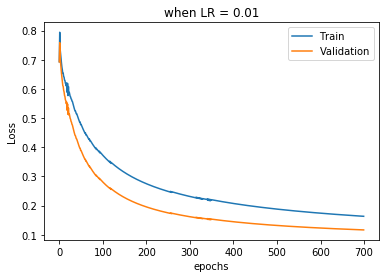

In [18]:
plt.plot(cost_T, label='Train')
plt.plot(cost_V, label='Validation')
plt.title("when LR = 0.01")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend() 

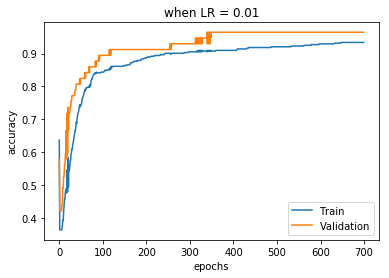

In [19]:
plt.plot(accT, label= 'Train')
plt.plot(accV, label= 'Validation')
plt.title("when LR = 0.01")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend() 